In [1]:
#importing  the necessity libraries
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [48]:
#load the tips dataset 
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
tips['time'].unique()


['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

tips['time'] = encoder.fit_transform(tips['time'])
tips['sex'] = encoder.fit_transform(tips['sex'])
tips['smoker'] = encoder.fit_transform(tips['smoker'])


print(tips['time'].unique())
print(tips['sex'].unique())
print(tips['smoker'].unique())


[0 1]
[0 1]
[0 1]


In [9]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,0,2
1,10.34,1.66,1,0,Sun,0,3
2,21.01,3.50,1,0,Sun,0,3
3,23.68,3.31,1,0,Sun,0,2
4,24.59,3.61,0,0,Sun,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,Sat,0,3
240,27.18,2.00,0,1,Sat,0,2
241,22.67,2.00,1,1,Sat,0,2
242,17.82,1.75,1,0,Sat,0,2


In [10]:
x=tips.drop(labels=['day','time'],axis=1)
x.head()

,total_bill,tip,sex,smoker,size
0,16.99,1.01,0,0,2
1,10.34,1.66,1,0,3
2,21.01,3.50,1,0,3
3,23.68,3.31,1,0,2
4,24.59,3.61,0,0,4


In [11]:
y=tips.time
y.head()

0    0
1    0
2    0
3    0
4    0
Name: time, dtype: int32

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12)

In [14]:
x_train.head()

,total_bill,tip,sex,smoker,size
135,8.51,1.25,0,0,2
149,7.51,2.00,1,0,2
124,12.48,2.52,0,0,2
29,19.65,3.00,0,0,2
231,15.69,3.00,1,1,3


In [15]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [16]:
x_test.shape

(49, 5)

In [17]:
y_pred=gnb.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0])

In [18]:
gnb_type = type(gnb)
print("Type of 'gnb':", gnb_type)

Type of 'gnb': <class 'sklearn.naive_bayes.GaussianNB'>


In [19]:
x_test

,total_bill,tip,sex,smoker,size
152,17.26,2.74,1,0,3
31,18.35,2.50,1,0,4
48,28.55,2.05,1,0,3
61,13.81,2.00,1,1,2
239,29.03,5.92,1,0,3
142,41.19,5.00,1,0,5
101,15.38,3.00,0,1,2
242,17.82,1.75,1,0,2
238,35.83,4.67,0,0,3
106,20.49,4.06,1,1,2


In [20]:
y_test

152    0
31     0
48     0
61     0
239    0
142    1
101    0
242    0
238    0
106    0
183    0
11     0
208    0
218    0
98     0
63     0
94     0
7      0
159    0
120    1
184    0
200    1
83     1
202    1
21     0
230    0
92     0
166    0
6      0
87     1
164    0
12     0
185    0
199    1
78     1
52     0
23     0
127    1
225    1
207    0
122    1
243    0
24     0
32     0
234    0
227    0
222    1
209    0
10     0
Name: time, dtype: int32

In [21]:
len(y_test)

49

In [22]:
y_pred-y_test

152    0
31     0
48     0
61     0
239    0
142   -1
101    0
242    0
238    0
106    0
183    0
11     0
208    0
218    0
98     0
63     0
94     0
7      0
159    0
120   -1
184    0
200   -1
83    -1
202    0
21     1
230    0
92     1
166    0
6      0
87    -1
164    0
12     0
185    0
199   -1
78    -1
52     0
23     0
127    0
225    0
207    0
122   -1
243    1
24     0
32     1
234    0
227    0
222   -1
209    1
10     0
Name: time, dtype: int32

In [23]:
len(y_test)

49

In [24]:
37/len(y_test)*100

75.51020408163265

In [25]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0])

In [26]:
37/38

0.9736842105263158

In [27]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [28]:
gnb.predict([[16.99,1.01,0,0,3]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [29]:
gnb.score(x_test,y_test)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.7142857142857143

In [30]:
from sklearn import metrics
print("Gaussian naive bayes model accuracy(in %):",metrics.accuracy_score(y_test,y_pred)*100)

Gaussian naive bayes model accuracy(in %): 71.42857142857143


In [31]:
gnb.class_count_ # no of training samples observed in  each class

array([139.,  56.])

In [32]:
gnb.class_prior_ #probablity of each class

array([0.71282051, 0.28717949])

In [33]:
gnb.classes_#class labels known of the classifier

array([0, 1])

In [34]:
gnb.epsilon_#absolute addictive value to variances

7.866671514529916e-08

In [35]:
gnb.var_ #variance of each value to variance

array([[84.76457368,  2.03863611,  0.20796033,  0.23911814,  0.78867561],
       [53.15536118,  1.445871  ,  0.24489804,  0.21141589,  1.10427304]])

In [36]:
gnb.theta_ #mean of each feature per class

array([[20.63697842,  3.09223022,  0.70503597,  0.39568345,  2.58992806],
       [16.82178571,  2.66571429,  0.42857143,  0.30357143,  2.44642857]])

In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[32  5]
 [ 9  3]]


<Axes: >

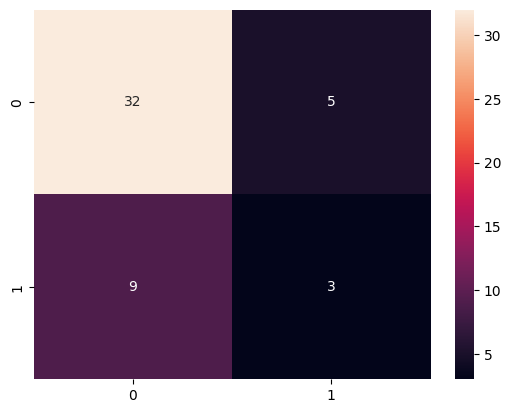

In [38]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [39]:
print(metrics.classification_report(y_test,y_pred))#actual values=y_test, predicted values=y_pred

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        37
           1       0.38      0.25      0.30        12

    accuracy                           0.71        49
   macro avg       0.58      0.56      0.56        49
weighted avg       0.68      0.71      0.69        49



In [40]:
tips.time

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    0
241    0
242    0
243    0
Name: time, Length: 244, dtype: int32

In [41]:
y_test

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0])

In [42]:
from sklearn.naive_bayes import CategoricalNB,ComplementNB,MultinomialNB

In [43]:
cnb=CategoricalNB().fit(x_train,y_train)
comp_nb=ComplementNB().fit(x_train,y_train)
mul_nb=MultinomialNB().fit(x_train,y_train)

In [44]:
cnb.y_pred=cnb.predict(x_test)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


In [45]:
cnb.score(x_test,y_test)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


0.6938775510204082

In [46]:
comp_nb.score(x_test,y_test)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


0.46938775510204084

In [47]:
mul_nb.score(x_test,y_test)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


0.7551020408163265